In [37]:
import sys, os
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(1, '../scripts')
root = os.getcwd()

from TwintDataMiner import TwintDataMiner
from PandasDataCleaner import PandasDataCleaner
from TextBlobSentiment import TextBlobSentiment
from Visualisation import Visualisation
from GMM import GMM

In [38]:
tdm = TwintDataMiner()
attributes = ["id", "tweet", "place", "date"]

before_df = pd.DataFrame()

# before
for i in range(1, 16):
    if i < 10:
        path = f"../data/Final/before/tweets_march_2020_03_10_0{i}-00-00.csv"
    else:
        path = f"../data/Final/before/tweets_march_2020_03_10_{i}-00-00.csv"

    try:
        before_df = before_df.append(tdm.getPandasDataFrame(attributes, path))
    except FileNotFoundError:
        print(path)
        pass
        
# tweetsFile = "../data/1000TweetsPerDay.csv"

../data/Final/before/tweets_march_2020_03_10_01-00-00.csv
../data/Final/before/tweets_march_2020_03_10_02-00-00.csv
../data/Final/before/tweets_march_2020_03_10_03-00-00.csv
../data/Final/before/tweets_march_2020_03_10_04-00-00.csv
../data/Final/before/tweets_march_2020_03_10_05-00-00.csv
../data/Final/before/tweets_march_2020_03_10_06-00-00.csv
../data/Final/before/tweets_march_2020_03_10_07-00-00.csv
../data/Final/before/tweets_march_2020_03_10_08-00-00.csv
../data/Final/before/tweets_march_2020_03_10_09-00-00.csv
../data/Final/before/tweets_march_2020_03_10_10-00-00.csv
../data/Final/before/tweets_march_2020_03_10_11-00-00.csv
../data/Final/before/tweets_march_2020_03_10_12-00-00.csv
../data/Final/before/tweets_march_2020_03_10_13-00-00.csv
../data/Final/before/tweets_march_2020_03_10_14-00-00.csv
../data/Final/before/tweets_march_2020_03_10_15-00-00.csv


In [19]:
print(before_df.shape)
before_df.head

(553292, 4)


<bound method NDFrame.head of                         id                                              tweet  \
0                       id                                              tweet   
1      1237181373946966018  Trump discusses economics surrounding coronavi...   
2      1237181373896671232  MLB's locker room ban is first step in dealing...   
3      1237181372898344960  Oil prices plunge as coronavirus fears soar an...   
4      1237181372579618817  As governments and companies try to reduce the...   
...                    ...                                                ...   
56613  1237378894258483200  Doctor in Italy gives emotional account of wor...   
56614  1237378894199762944   https://gazetacentral.blogspot.com/2020/03/os...   
56615  1237378894023581696  Great example of global youth playing importan...   
56616  1237378893713203202  #Awareness 😷 🇬🇧 Sixth UK coronavirus death con...   
56617  1237378893683793922  Yo creo que a este de ha atacado el Coronaviru...  

In [20]:
after_df = pd.DataFrame()

# after
for i in range(1, 24):
    if i < 10:
        path = f"../data/Final/after/tweets_march_2020_03_12_0{i}-00-00.csv"
    else:
        path = f"../data/Final/after/tweets_march_2020_03_12_{i}-00-00.csv"

    try:
        after_df = after_df.append(tdm.getPandasDataFrame(attributes, path))
    except FileNotFoundError:
        print(path)
        pass

../data/Final/after/tweets_march_2020_03_12_01-00-00.csv
../data/Final/after/tweets_march_2020_03_12_05-00-00.csv
../data/Final/after/tweets_march_2020_03_12_06-00-00.csv
../data/Final/after/tweets_march_2020_03_12_07-00-00.csv
../data/Final/after/tweets_march_2020_03_12_08-00-00.csv
../data/Final/after/tweets_march_2020_03_12_09-00-00.csv
../data/Final/after/tweets_march_2020_03_12_10-00-00.csv


In [21]:
print(after_df.shape)
after_df.head

(1049371, 4)


<bound method NDFrame.head of                         id                                              tweet  \
0                       id                                              tweet   
1      1237921249482797056  not tom hanks having the corona virus i'll som...   
2      1237921249445240832  #coronavirus #virus #sickpeople  https://www.i...   
3      1237921249445232640                   Netflix and chills. #coronavirus   
4      1237921249277468673  en 1 semana y media nos contagiamos de coronav...   
...                    ...                                                ...   
65996  1238230727352881160  Coronavirus: al carnaval de Basilea se lo llev...   
65997  1238230727298334722  Emergenza Coronavirus. Il tecnico dell'Arsenal...   
65998  1238230727260622848  Eventos nacionais e internacionais são cancela...   
65999  1238230727126384640  no que capaz me soplas y me contagias el coron...   
66000  1238230727126327298  Coronavirus is getting serious now. This isn’t...  

In [22]:
before_df.drop_duplicates(subset='id')
print(before_df.shape)
print("----")
after_df.drop_duplicates(subset='id')
print(after_df.shape)

(553292, 4)
----
(1049371, 4)


In [23]:
def cleandf(df):
    pdc = PandasDataCleaner()
    
    df  = pdc.detectLanguage(df, 'tweet', 'lang') 
    df = df.loc[df['lang'] == 'en']
    df = df.reset_index(drop=True)
    return df

df = cleandf(df)

Detecting language: 89956/89957

In [11]:
vocab =['PPE',
 'afraid',
 'aggravation',
 'air',
 'alarmed',
 'alarming',
 'ante la crisis',
 'anxiety',
 'anxious',
 'apprehensive',
 'atmosphere',
 'brutal',
 'chaos',
 'chaotic',
 'charity',
 'clean air',
 'clean water',
 'comfort',
 'coronavirus fear',
 'crisis',
 'danger',
 'dangerous',
 'dead',
 'death',
 'disaster',
 'disastrous',
 'distress',
 'distressed',
 "don't panic",
 'donations',
 'earth',
 'encourage',
 'encouraging',
 'environment',
 'evil',
 'exaggerate',
 'exaggerating',
 'exaggeration',
 'faint',
 'fantastic',
 'fearful',
 'fearschaos',
 'fighter',
 'fitness',
 'flabbergast',
 'flabbergasted',
 'flatten',
 'food wastage',
 'freaked',
 'free',
 'fright',
 'frightened',
 'genocide',
 'gloves',
 'government funds',
 'gratitude',
 'grief',
 'grievance',
 'gruesome',
 'happy',
 'harm',
 'healing',
 'health issue',
 'heartbreaking',
 'hell',
 'helpless',
 'honor',
 'hope',
 'horrendous',
 'horrific',
 'horrify',
 'horrifying',
 'hospital',
 'humanity',
 'impovement',
 'improving',
 'kill',
 'killed',
 'killingthreat',
 'kills',
 'life-threatening',
 'masks',
 'meditation',
 'mild',
 'murder',
 'negative',
 'nervous',
 'not panic',
 'not serious',
 'nurses',
 'optimism',
 'optimistic',
 'overcome',
 'overreact',
 'overreacted',
 'overreacting',
 'ozone',
 'panic',
 'panick',
 'panicked',
 'panicking',
 'panicky',
 'paranoid',
 'pasta',
 'phobia',
 'positive',
 'problem',
 'progress',
 'promise',
 'promosing',
 'protect',
 'proud',
 'quality',
 'ran out',
 'rattle',
 'rattled',
 'recover',
 'recovery',
 'relief',
 'respect',
 'rice',
 'risk',
 'sad',
 'sadness',
 'scared',
 'scarefear',
 'scarier',
 'scariest',
 'scarily',
 'shock',
 'shocked',
 'shocking',
 'shockingly',
 'spanish flu',
 'strength',
 'strong',
 'stronger',
 'successfully',
 'support',
 'surreal',
 'terrible',
 'terror',
 'tests',
 'thank you',
 'thanks',
 'threatening',
 'together',
 'toilet paper',
 'tragic',
 'travel alert',
 'trust',
 'unbearable',
 'unhygienic',
 'unnerve',
 'unnerved',
 'unnerving',
 'unserious',
 'upset',
 'upseting',
 'upsets',
 'upsettingly',
 'vaccine',
 'warned'
 'warning',
 'wonderful',
 'worried',
 'worryingly',
 'worry',]

In [150]:
bowMatrix = np.empty((1, len(vocab)), int)
gmm = GMM()
#generate bag of words for each day and add to matrix
for j in range(1,5):
    for i in range(1,32):
        if(not((j == 1 and i < 10) or (j == 2 and i > 29) or (j == 4 and i > 6))):
            date = "2020-0" + str(j) + "-" + str(i).zfill(2)
            tempdf = df[df.date == date].copy()
            tempdf = tempdf.reset_index(drop=True)

            tempdf.sort_values("id", inplace=True) 
  
            # dropping duplicate values 
            tempdf.drop_duplicates(subset=["tweet"],inplace=True) 
            #pdc = PandasDataCleaner()
            #tempdf  = pdc.detectLanguage(tempdf, 'tweet', 'lang')
            #tempdf = tempdf.loc[tempdf['lang'] == 'en']
            #tempdf = pdc.cleanTweets(tempdf, 'tweet')
            for i in range(5):
                smalldf =tempdf[i*50:(i+1)*50].copy()
                bow = gmm.generateBagOfWords(smalldf, 'tweet', vocab=vocab)
                #get total bag of words for day
                panicRow = np.sum(bow, axis=0)
                bowMatrix = np.append(bowMatrix, np.reshape(panicRow, (1, len(vocab))), axis=0)
            
            
            
#delete row created for initialisation          
bowMatrix = np.delete(bowMatrix, (0), axis=0)
print(bowMatrix.shape)
print(bowMatrix)


(440, 167)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [183]:
from sklearn.feature_extraction.text import CountVectorizer

#panic words
controltweet1 = ['death disaster scared unbearable upset worry terror']# terrible sad scarier risk problem']# negative panic panicked helpless harm grief fright fearful distress distressed crisis chaos afraid positive hope']
#non panic words
controltweet2 = ['recovery optimistic humanity comfort encourage wonderful trust charity clean encourage']# encouraging fantastic gratitude healing hope humanity improvement improving optimism positive recover strength support successfully']
count = CountVectorizer(vocabulary=vocab)
bag_of_words_bad = count.fit_transform(controltweet1)
bow_bad = bag_of_words_bad.toarray()
#apply maxi function so control tweet doesn't skew data massively
#bow_bad = np.array(list(map(lambda x: maxi(x, 1), bow_bad[0])))

bag_of_words_good = count.fit_transform(controltweet2)
bow_good = bag_of_words_good.toarray()

#bow_good = np.array(list(map(lambda x: maxi(x, 1), bow_good[0])))

#add control vectors to matrix for classification
bowMatrix = np.append(bowMatrix, np.reshape(bow_bad, (1, len(vocab))), axis=0)
bowMatrix = np.append(bowMatrix, np.reshape(bow_good, (1, len(vocab))), axis=0)
print(bowMatrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


modelling


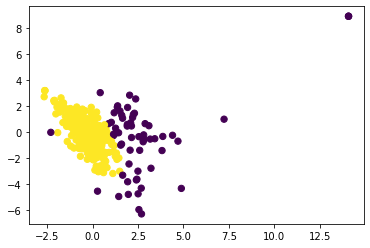

In [184]:
done = False
while(not done):
    print("modelling")
    panic = gmm.modelFromBow(bowMatrix)
    if(round(panic[-1][0]) != round(panic[-2][0])):
       done = True

In [185]:
print(panic[-1])
print(panic[-2])

[1. 0.]
[0.01529875 0.98470125]


In [189]:
onePanic = np.round(panic[:, 0])
onePanic = np.array(list(map(lambda x: int(x == onePanic[-1]), onePanic)))[:-2]
print(onePanic)
print(len(onePanic))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
444


In [190]:
finalPanic = []
for i in range(int(len(onePanic) / 5)):
    finalPanic.append(sum(onePanic[i*5: (i+1)*5]))

In [461]:
import datetime
# reading data from csv file
ftsedf= pd.read_csv("../data/ftse100.csv")

# Turning date columns into numbered duplicates
s = ftsedf.columns.to_series()
mask = ftsedf.columns.duplicated(keep=False)
c = np.where(mask, s + '_'  + (s.groupby(s).cumcount() + 1).astype(str) , s)
ftsedf.columns = c


# lists for columns in the dataset
dates = ['Date']
indices = ["FTSE 100"]

# turning dates with times into just dates
ftsedf[dates] = ftsedf[dates].apply(pd.to_datetime, format='%m/%d/%Y %H:%M')
for d in dates: ftsedf[d] = ftsedf[d].dt.date

# # merging date columns into one filling any missing entries with 
# ftsedf = pd.concat([ftsedf[[d, i]].rename(columns={d: 'Date'}) for d in dates for i in indices]).dropna(how='all')
# ftsedf = ftsedf.groupby('Date',as_index=False).apply(lambda x:x.ffill().bfill().drop_duplicates())

# removing duplicate rows
ftsedf = ftsedf.drop_duplicates(['Date']).set_index(['Date'])

# # Normalizing the data
# ftsedf=(ftsedf-ftsedf.min())/(ftsedf.max()-ftsedf.min())


# ftsedf['date'] = ftsedf.index

ftsedf = ftsedf.reset_index()



startdate = datetime.date(2020,1,10)
enddate = datetime.date(2020,4,7)



delta = enddate - startdate
for i in range(delta.days):
    insertdate = (startdate + datetime.timedelta(days=i))
    
    if(insertdate.weekday() == 5):
        start = ftsedf.loc[ftsedf['Date'] == (insertdate-datetime.timedelta(days=1))]
        startvalue = ((start['FTSE 100'].values[0]))
        
        end = ftsedf.loc[ftsedf['Date'] == (insertdate+datetime.timedelta(days=2))]
        endvalue = ((end['FTSE 100'].values[0]))
        
        
        difference = endvalue - startvalue
        saturdayvalue = startvalue + (difference /3)
        sundayvalue = startvalue + ((difference/3)*2)
        
        saturday = pd.DataFrame({"Date":[insertdate], "FTSE 100":[saturdayvalue]})
        ftsedf = ftsedf.append(saturday)
        
        sunday = pd.DataFrame({"Date":[insertdate+datetime.timedelta(days=1)], "FTSE 100":[sundayvalue]})
        ftsedf = ftsedf.append(sunday)




ftsedf = ftsedf[(ftsedf['Date'] >=datetime.date(2020,1,10))]
ftsedf = ftsedf.sort_values(by=['Date']).reset_index()

ftselist = (ftsedf['FTSE 100'].tolist())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(ftsedf)

# displaying the dataframe
#plt.figure()
#print(df)

#ax = df.plot(figsize=(20,10))
#ax.grid()
#ax.set_ylabel('Normalized Stock Price')

    index        Date     FTSE 100
0       6  2020-01-10  7587.850000
1       0  2020-01-11  7597.766667
2       0  2020-01-12  7607.683333
3       7  2020-01-13  7617.600000
4       8  2020-01-14  7622.350000
5       9  2020-01-15  7642.800000
6      10  2020-01-16  7609.810000
7      11  2020-01-17  7674.560000
8       0  2020-01-18  7666.853333
9       0  2020-01-19  7659.146667
10     12  2020-01-20  7651.440000
11     13  2020-01-21  7610.700000
12     14  2020-01-22  7571.920000
13     15  2020-01-23  7507.670000
14     16  2020-01-24  7585.980000
15      0  2020-01-25  7528.003333
16      0  2020-01-26  7470.026667
17     17  2020-01-27  7412.050000
18     18  2020-01-28  7480.690000
19     19  2020-01-29  7483.570000
20     20  2020-01-30  7381.960000
21     21  2020-01-31  7286.010000
22      0  2020-02-01  7299.443333
23      0  2020-02-02  7312.876667
24     22  2020-02-03  7326.310000
25     23  2020-02-04  7439.820000
26     24  2020-02-05  7482.480000
27     25  2020-02-0

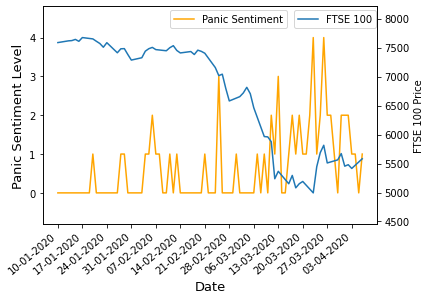

In [462]:
import matplotlib.ticker as plticker
xticks=[]
xtickyes = 0
xticksno = []
spacing = 7
for j in range(1,5):
    for i in range(1,32):
        if(not((j == 1 and i < 10) or (j == 2 and i > 29) or (j ==4 and i > 6))):
            date = str(i).zfill(2) +"-0" + str(j) + "-2020" 
            if(xtickyes == 0):
                xticks.append(date)
            else:
                xticksno.append(" ")
            xtickyes = (xtickyes + 1) % spacing
xticks += xticksno
loc = plticker.MultipleLocator(base=100) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
fig, ax = plt.subplots()
ax.plot(finalPanic, label='Panic Sentiment', color='orange')
plt.xlabel("Date", fontsize=13)
plt.xticks(range(0, len(xticks)), xticks, rotation=40)
ax2 = ax.twinx() 
ax2.plot(ftselist, label='FTSE 100')
ax2.set_ylabel("FTSE 100 Price")

ax.set_ylabel("Panic Sentiment Level", fontsize=13)
ax.set_xticks(ax.get_xticks()[::spacing])
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
ax.legend(loc=(0.38,0.9))
ax2.legend(loc=(0.75,0.9))
ax.margins(y=0.2)
ax2.margins(y=0.2)
plt.show()


In [463]:
from scipy.stats import pearsonr
p, r = pearsonr(ftselist,finalPanic)
print(p)

-0.5486575697349654
